# extended Baseline Model

Refactored code from Week 3 based on mentor feedback

In [40]:
import os
path = os.getcwd()
print(path)

C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\data


In [41]:
%cd C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\

C:\Users\hanna\PycharmProjects\berlindslab\ds-lab


In [42]:
# imports and magic line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from emissionscheck_alb import data_prep, baseline_model


In [43]:
%cd C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\data

C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\data


In [44]:
df = pd.read_csv("../data/sample.csv", lineterminator='\n')

c:\users\hanna\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,7,18,26,108,109,113) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
# get columns for data exploration
df_subset = df[["MODEL","RecordID", "TEST_SDATE", "TEST_EDATE", "ODOMETER", "VEHICLE_TYPE", "MODEL_YEAR", "FUEL_TYPE", "GVW_TYPE", "OVERALL_RESULT"]]

In [46]:
# get car age
df_subset = data_prep.get_car_age(df_subset)
df_subset.head()

,MODEL,RecordID,TEST_SDATE,TEST_EDATE,ODOMETER,VEHICLE_TYPE,MODEL_YEAR,FUEL_TYPE,GVW_TYPE,OVERALL_RESULT,CAR_AGE
0,RANGER REG. CAB - SHO,111260,2004-12-16 10:57:00,2004-12-16 11:03:00,53274,3,1994,G,1.0,P,11
1,CAVALIER,138031,2004-08-13 14:10:00,2004-08-13 14:12:00,109225,1,2000,G,1.0,P,5
2,FESTIVA,298121,2004-08-31 13:03:00,2004-08-31 13:03:00,110347,1,1989,G,1.0,A,16
3,GRAND WAGONEER,369185,2004-12-02 11:33:00,2004-12-02 11:39:00,152121,4,1985,G,2.0,P,20
4,SC,384955,2004-12-29 17:00:00,2004-12-29 17:03:00,135640,1,1997,G,1.0,P,8


In [47]:
# Keep rows with only P or F in OVERALL RESULT
df_subset = data_prep.keep_pass_fail(df_subset)

In [48]:
df_subset.shape

(346783, 11)

## Remove strange odometer values

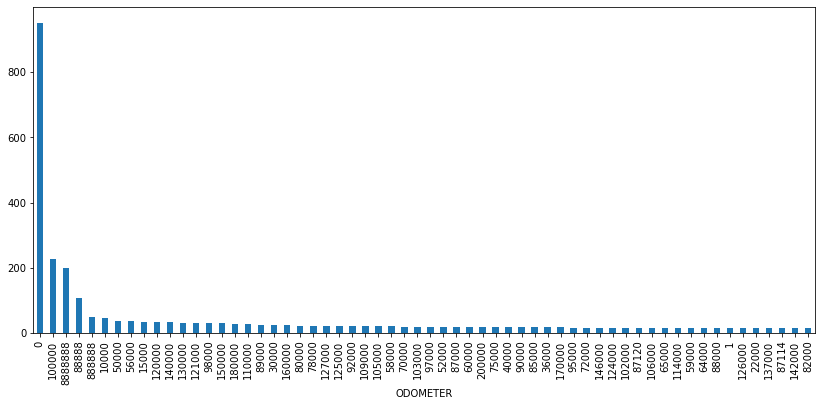

In [49]:
fig, ax = plt.subplots(figsize=(14,6))
df_subset.groupby('ODOMETER').size().sort_values(ascending=False).head(60).plot.bar()

In [50]:
# remove odometer values over 400000
df_subset = df_subset[df_subset['ODOMETER']<=400000]

In [51]:
# exclude 0 odometer values
df_subset = df_subset[df_subset['ODOMETER']>0]

In [52]:
df_subset.shape

(344947, 11)

In [53]:
# exclude 88.888 and 100.000 odometer values
df_subset = df_subset[(df_subset['ODOMETER']!=88888) & (df_subset['ODOMETER']!=100000)]

In [54]:
df_subset.shape

(344613, 11)

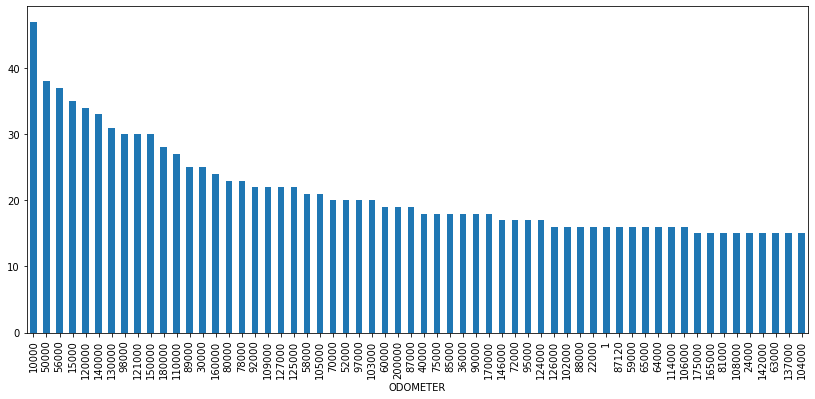

In [55]:
fig, ax = plt.subplots(figsize=(14,6))
df_subset.groupby('ODOMETER').size().sort_values(ascending=False).head(60).plot.bar()

## Encoding target

In [56]:
target = data_prep.encode_target(df_subset["OVERALL_RESULT"])

## Create df of features only

In [57]:
df_features = df_subset[["VEHICLE_TYPE", "FUEL_TYPE", "GVW_TYPE", "ODOMETER", "CAR_AGE"]]

## Logistic Regression

* continuous: odometer, car age
* categorical: vehicle type, fuel_type, gvw_type

In [58]:
# Continuous and categorical features
cat_features = ["VEHICLE_TYPE", "FUEL_TYPE", "GVW_TYPE"]

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

In [59]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg",
                               random_state=42, 
                                class_weight="balanced")

NameError: name 'max_iter' is not defined

## model with continuous features only


In [60]:

features_train, features_test, target_train, target_test = data_prep.split_data(features_matrix = df_features[["ODOMETER", "CAR_AGE"]],
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced")

NameError: name 'max_iter' is not defined

In [61]:
df_features = df_subset[["MODEL", "FUEL_TYPE", "GVW_TYPE", "ODOMETER", "CAR_AGE","MODEL"]]

In [ ]:
# Continuous and categorical features - substitute MAKE by MODEL
cat_features = ["MODEL", "FUEL_TYPE", "GVW_TYPE"]

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

In [ ]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=200)